In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Converting the data into a dataframe

In [2]:
df= pd.read_csv('train.csv')

Getting a preview of the data

In [3]:
df.head()

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,0xd6c,759.70,55.95,944.55,2422.07,541.27,1,3,2,4.23,9,1.0,0.0,0,1.0,gas,vegetarian,1,NaN,830.10
1,0x3fdf,387.06,70.59,1280.85,1995.3,280.39,1,2,1,3.27,8,0.0,0.0,0,0.0,electric,vegetarian,0,0.0,963.08
2,0x3b08,594.25,29.14,1005.72,2673.55,416.14,0,2,3,2.87,3,0.0,1.0,0,1.0,electric,omnivore,1,1.0,840.11
3,0x31e5,503.76,74.68,1049.46,2994.28,530.13,0,5,1,3.22,9,1.0,0.0,0,0.0,electric,omnivore,1,0.0,1252.42
4,0x397e,549.54,-77.00,756.49,2549.57,604.10,5,4,4,2.92,2,1.0,0.0,0,1.0,electric,vegetarian,0,1.0,580.74


Getting the names of the columns

In [4]:
df.columns

Index(['ID', 'electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'heating_type', 'diet_type', 'owns_pet',
       'smart_thermostat_installed', 'carbon_footprint'],
      dtype='object')

Finding out the population statistics for the numerical columns

In [5]:
df.describe()

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,water_usage_liters_per_day,public_transport_usage_per_week,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,owns_pet,smart_thermostat_installed,carbon_footprint
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,13590.000000,13610.000000,14000.000000,13569.000000,14000.000000,13584.000000,14000.000000
mean,389.866107,47.588121,796.046458,385.497657,3.271357,3.003857,3.008954,5.005571,0.706034,0.393608,0.199571,0.498784,0.500143,0.301899,776.046010
std,119.070653,25.098685,340.217925,127.034232,2.942215,1.147641,1.464928,2.568548,0.455593,0.488568,0.399692,0.500017,0.500018,0.459099,190.432709
min,-99.000000,-99.000000,-1567.182896,-99.000000,-14.000000,-4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000
25%,325.067500,35.410000,587.525000,322.547500,1.000000,2.000000,1.980000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,631.065000
50%,394.995000,49.205000,792.885000,395.325000,3.000000,3.000000,2.990000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,763.725000
75%,464.440000,62.872500,1003.462500,464.652500,5.000000,4.000000,4.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,905.910000
max,786.890000,116.950000,2697.807683,885.940000,17.000000,9.000000,8.440000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1610.000000


Checking the data types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14000 non-null  object 
 1   electricity_kwh_per_month        14000 non-null  float64
 2   natural_gas_therms_per_month     14000 non-null  float64
 3   vehicle_miles_per_month          14000 non-null  float64
 4   house_area_sqft                  14000 non-null  object 
 5   water_usage_liters_per_day       14000 non-null  float64
 6   public_transport_usage_per_week  14000 non-null  int64  
 7   household_size                   14000 non-null  object 
 8   home_insulation_quality          14000 non-null  int64  
 9   meat_consumption_kg_per_week     14000 non-null  float64
 10  laundry_loads_per_week           14000 non-null  int64  
 11  recycles_regularly               13590 non-null  float64
 12  composts_organic_w

As we can see above the dataframe has 14000 rows. 

But there are a few columns with less than 14000 non-null values. Meaning they have missing data

Checking to see the columns with null values

In [7]:
df.isna().any()

ID                                 False
electricity_kwh_per_month          False
natural_gas_therms_per_month       False
vehicle_miles_per_month            False
house_area_sqft                    False
water_usage_liters_per_day         False
public_transport_usage_per_week    False
household_size                     False
home_insulation_quality            False
meat_consumption_kg_per_week       False
laundry_loads_per_week             False
recycles_regularly                  True
composts_organic_waste              True
uses_solar_panels                  False
energy_efficient_appliances         True
heating_type                       False
diet_type                          False
owns_pet                           False
smart_thermostat_installed          True
carbon_footprint                   False
dtype: bool

Checking the percentage null values of the columns for the columns with missing data.

Arranging that info in descending order

In [8]:
df.isna().mean()[df.isna().mean() > 0].sort_values(ascending=False)

energy_efficient_appliances    0.030786
smart_thermostat_installed     0.029714
recycles_regularly             0.029286
composts_organic_waste         0.027857
dtype: float64

Since the columns with missing data have 3% missing data or less we will drop these rows with missing data

In [9]:
#creating a list with the columns with missing values
cols_null_rows = list(df.isna().mean()[df.isna().mean() > 0].index)

#dropping the rows with null values
df.dropna(axis=0,subset=cols_null_rows,inplace=True)

Checking to ensure the columns were dropped

In [10]:
df.isna().mean()[df.isna().mean() > 0]

Series([], dtype: float64)

Converting hourse_area_sqft and household_size into floats

In [13]:
# Getting rows with non-numeric values in house_area column
null_rows = pd.to_numeric(df['house_area_sqft'], errors='coerce').isna()
non_numeric_rows_house_area = df[null_rows]
# non_numeric_rows_house_area.index

#dropping the rows with non-numeric values for the house_area column
df.drop(axis=0,index=non_numeric_rows_house_area.index,inplace=True)

In [14]:
# Getting rows with non-numeric values in household_size column
null_rows = pd.to_numeric(df['household_size'], errors='coerce').isna()
non_numeric_rows_household_size = df[null_rows]
# non_numeric_rows_household_size.index

#dropping the rows with non-numeric values for the household_size column
df.drop(axis=0,index=non_numeric_rows_household_size.index,inplace=True)

In [ ]:
#converting the columns to float
df['house_area_sqft'] = df['house_area_sqft'].astype('float')
df['household_size'] = df['household_size'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               11708 non-null  object 
 1   electricity_kwh_per_month        11708 non-null  float64
 2   natural_gas_therms_per_month     11708 non-null  float64
 3   vehicle_miles_per_month          11708 non-null  float64
 4   house_area_sqft                  11708 non-null  float64
 5   water_usage_liters_per_day       11708 non-null  float64
 6   public_transport_usage_per_week  11708 non-null  int64  
 7   household_size                   11708 non-null  float64
 8   home_insulation_quality          11708 non-null  int64  
 9   meat_consumption_kg_per_week     11708 non-null  float64
 10  laundry_loads_per_week           11708 non-null  int64  
 11  recycles_regularly               11708 non-null  float64
 12  composts_organic_w

In [ ]:
#checking the values in heating type column to make sure we only have gas,electric or none.
df['heating_type'].value_counts()

gas         5662
electric    4584
none        1124
_J-vT          1
SlA+a          1
            ... 
/;bqE          1
+my?s          1
l%b?4          1
Ty?8J          1
Z'KVY          1
Name: heating_type, Length: 341, dtype: int64

In [26]:
#finding the rows without gas,electric or none
null_heating_type = df['heating_type'][df['heating_type'].str.contains('gas|electric|none') == False]

#dropping those rows
df['heating_type'] = df['heating_type'].drop(axis=0,index = null_heating_type.index)

In [28]:
#confirming we have the expected values in the column
df['heating_type'].value_counts()

gas         5662
electric    4584
none        1124
Name: heating_type, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               11708 non-null  object 
 1   electricity_kwh_per_month        11708 non-null  float64
 2   natural_gas_therms_per_month     11708 non-null  float64
 3   vehicle_miles_per_month          11708 non-null  float64
 4   house_area_sqft                  11708 non-null  float64
 5   water_usage_liters_per_day       11708 non-null  float64
 6   public_transport_usage_per_week  11708 non-null  int64  
 7   household_size                   11708 non-null  float64
 8   home_insulation_quality          11708 non-null  int64  
 9   meat_consumption_kg_per_week     11708 non-null  float64
 10  laundry_loads_per_week           11708 non-null  int64  
 11  recycles_regularly               11708 non-null  float64
 12  composts_organic_w

In [32]:
df['diet_type'].value_counts()

omnivore      7120
vegetarian    3427
vegan         1161
Name: diet_type, dtype: int64

In [ ]:
#getting numeric column names
numeric_columns  = (df.dtypes[(df.dtypes == 'float64') |(df.dtypes == 'int64')].index)
#making a dataframe of numerical columns
df_numeric = df[numeric_columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 1 to 13999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   electricity_kwh_per_month        11708 non-null  float64
 1   natural_gas_therms_per_month     11708 non-null  float64
 2   vehicle_miles_per_month          11708 non-null  float64
 3   house_area_sqft                  11708 non-null  float64
 4   water_usage_liters_per_day       11708 non-null  float64
 5   public_transport_usage_per_week  11708 non-null  int64  
 6   household_size                   11708 non-null  float64
 7   home_insulation_quality          11708 non-null  int64  
 8   meat_consumption_kg_per_week     11708 non-null  float64
 9   laundry_loads_per_week           11708 non-null  int64  
 10  recycles_regularly               11708 non-null  float64
 11  composts_organic_waste           11708 non-null  float64
 12  uses_solar_panels 

<AxesSubplot:>

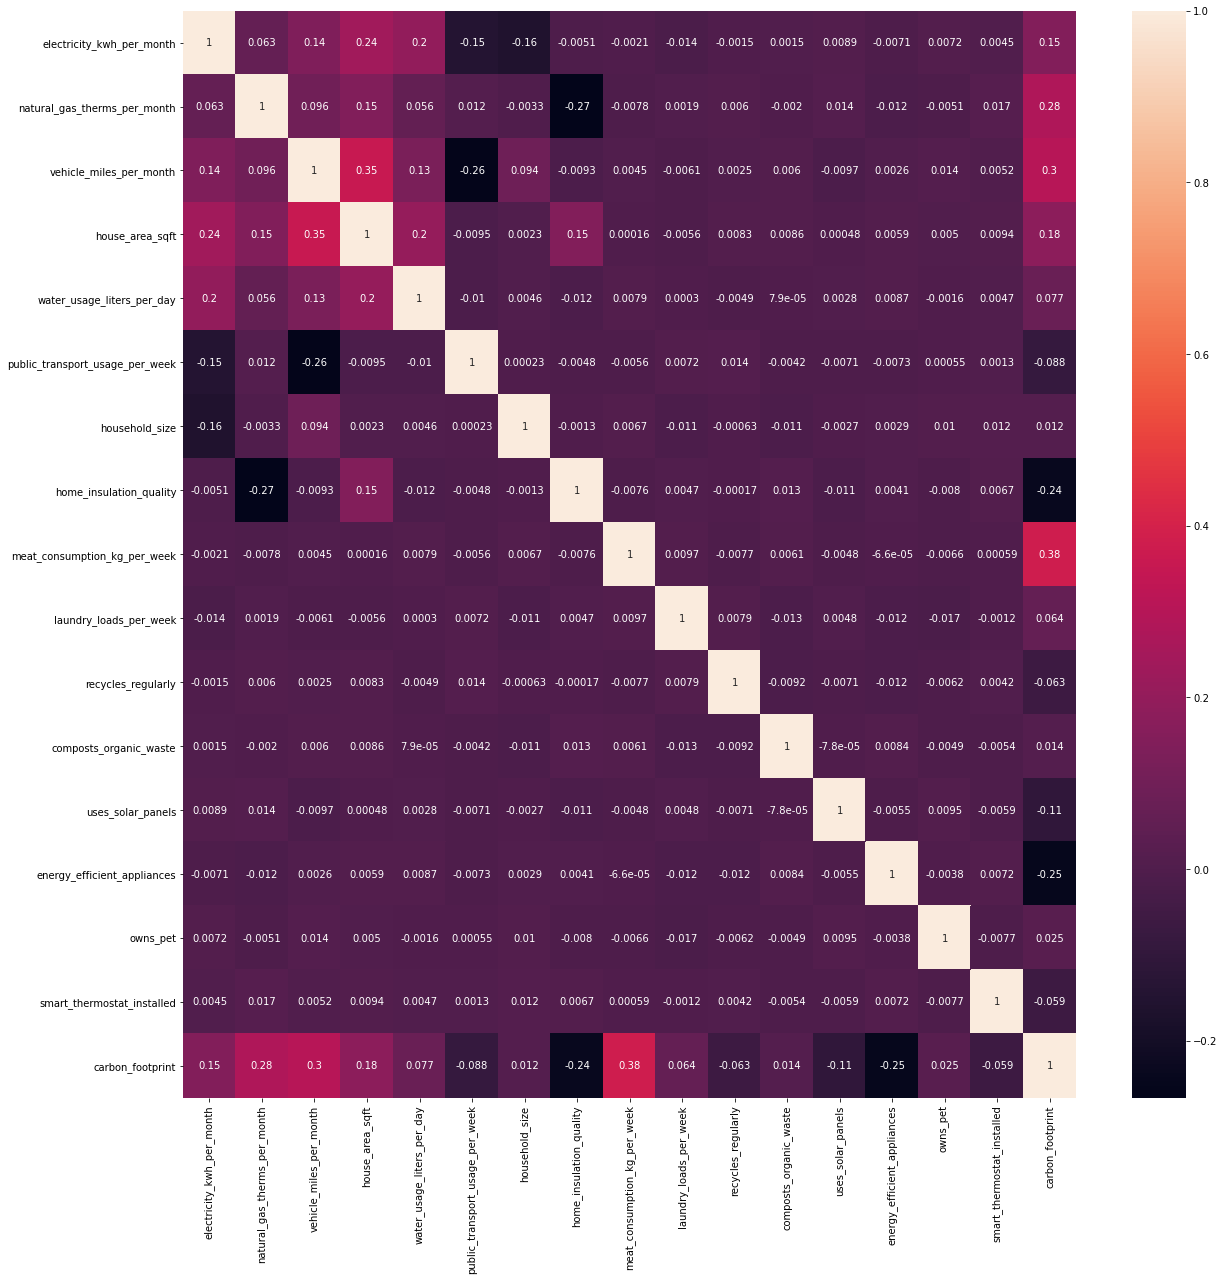

In [58]:
corr_matrix = df_numeric.corr(method = 'pearson')

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)